In [2]:
import numpy as np

In [3]:
def compute_rank_score(sort_res):
    ranks_adj = np.zeros(5)
    for rank,sort_as_index in enumerate(sort_res):
        ranks_adj[sort_as_index]+=rank
    return ranks_adj


def score_ranks(vec1,vec2,type_rank=0):
    if type_rank == 0:
        # the smaller the better
        v1_sort = np.argsort(vec1, axis=None)
        v2_sort = np.argsort(vec2, axis=None)
    elif type_rank == 1:
        # the larger the better
        v1_sort = np.argsort(vec1, axis=None)[::-1]
        v2_sort = np.argsort(vec2, axis=None)[::-1]
    elif type_rank == 2:
        # the first larger the better
        # the second larger the better
        v1_sort = np.argsort(vec1, axis=None)[::-1]
        v2_sort = np.argsort(vec2, axis=None)
        
    rank_score_v1 = compute_rank_score(v1_sort)
    rank_score_v2 = compute_rank_score(v2_sort)
    corr = np.corrcoef(rank_score_v1, rank_score_v2)
    return rank_score_v1,rank_score_v2,corr



In [4]:
graph_adj = [0.75, 0.9, 0.83,0.81,0.95]
graph_d_sep = [0.475, 0.514, 0.464,0.562,0.482]
dsep= [0.562,0.5,0.554,0.5,0]
cdir= [0.321,0,0.429,0,0]
intv= [0.2053,2.612,2.145,10,2.409]
cf= [1.586,1.475,1.50,10,1.125]

In [9]:
np.argsort(graph_adj, axis=None)
compute_rank_score(np.argsort(graph_adj, axis=None))

array([0., 3., 2., 1., 4.])

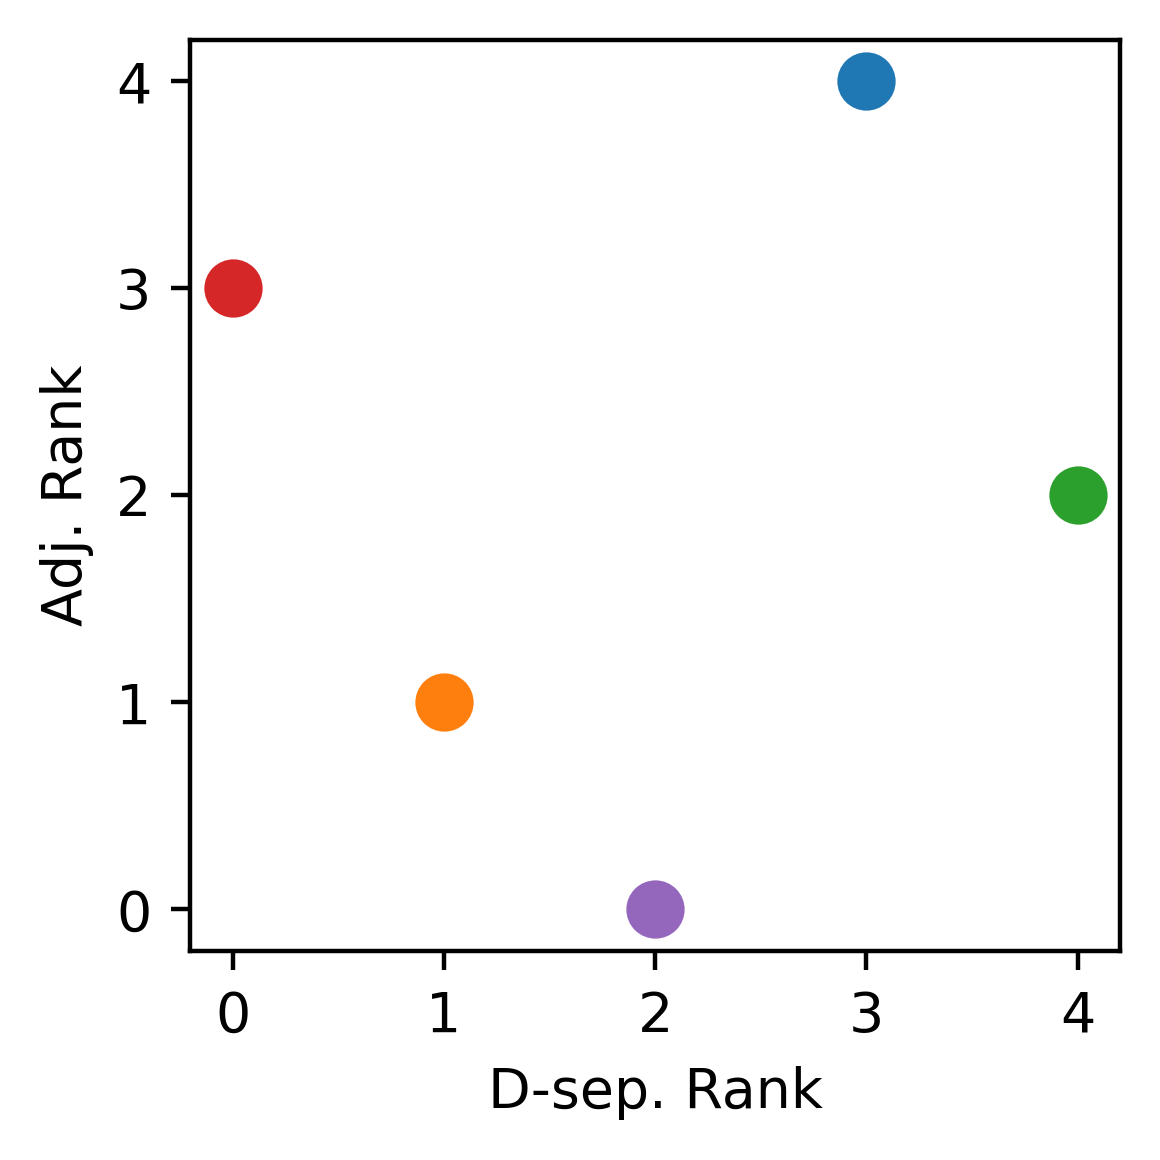

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


rank_score_adj,rank_score_d_sep,corr = score_ranks(graph_adj,graph_d_sep,1)

figure(figsize=(3, 3), dpi=400)
x = np.array([0, 1, 2, 3, 4])
methods = ['Llama', 'Qwen', 'Mistral', 'Gemma', 'Mixtral']
    
# Create a scatter plot
# plt.title(f'Causal graph reasoning tasks \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('D-sep. Rank')
plt.ylabel('Adj. Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_d_sep[i],rank_score_adj[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('graph.png', bbox_inches='tight')




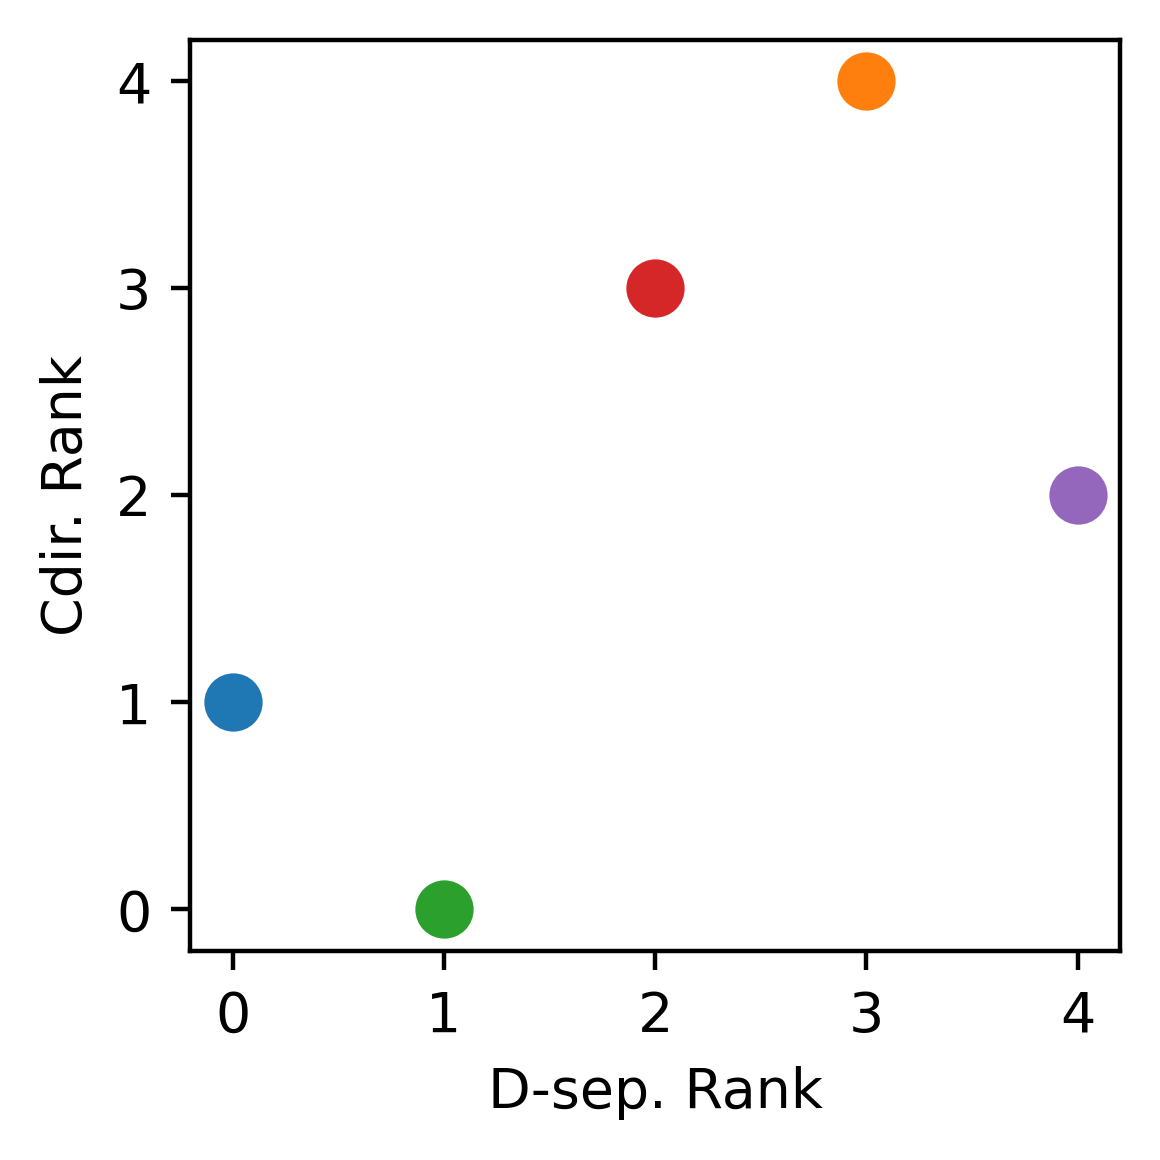

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


rank_score_dsep,rank_score_cdir,corr = score_ranks(dsep,cdir,1)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
plt.xlabel('D-sep. Rank')
plt.ylabel('Cdir. Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_dsep[i],rank_score_cdir[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('causal_discovery.png', bbox_inches='tight')




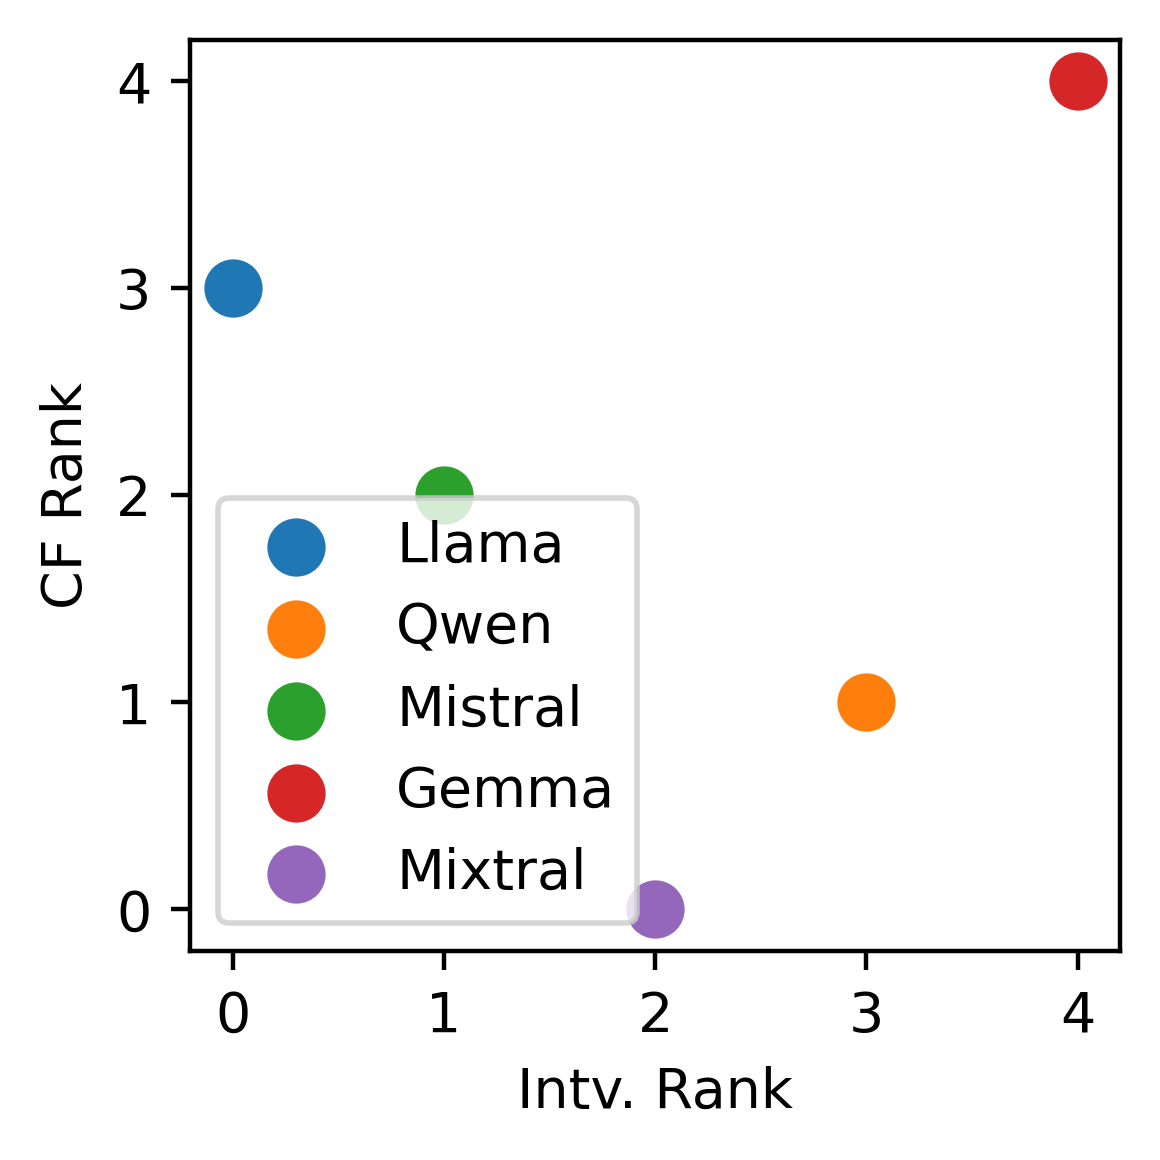

In [68]:
rank_score_intv,rank_score_cf,corr = score_ranks(intv,cf,0)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
plt.xlabel('Intv. Rank')
plt.ylabel('CF Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_intv[i],rank_score_cf[i],s=90)
    plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('decision_making.png', bbox_inches='tight')




[[ 1.  -0.9]
 [-0.9  1. ]]


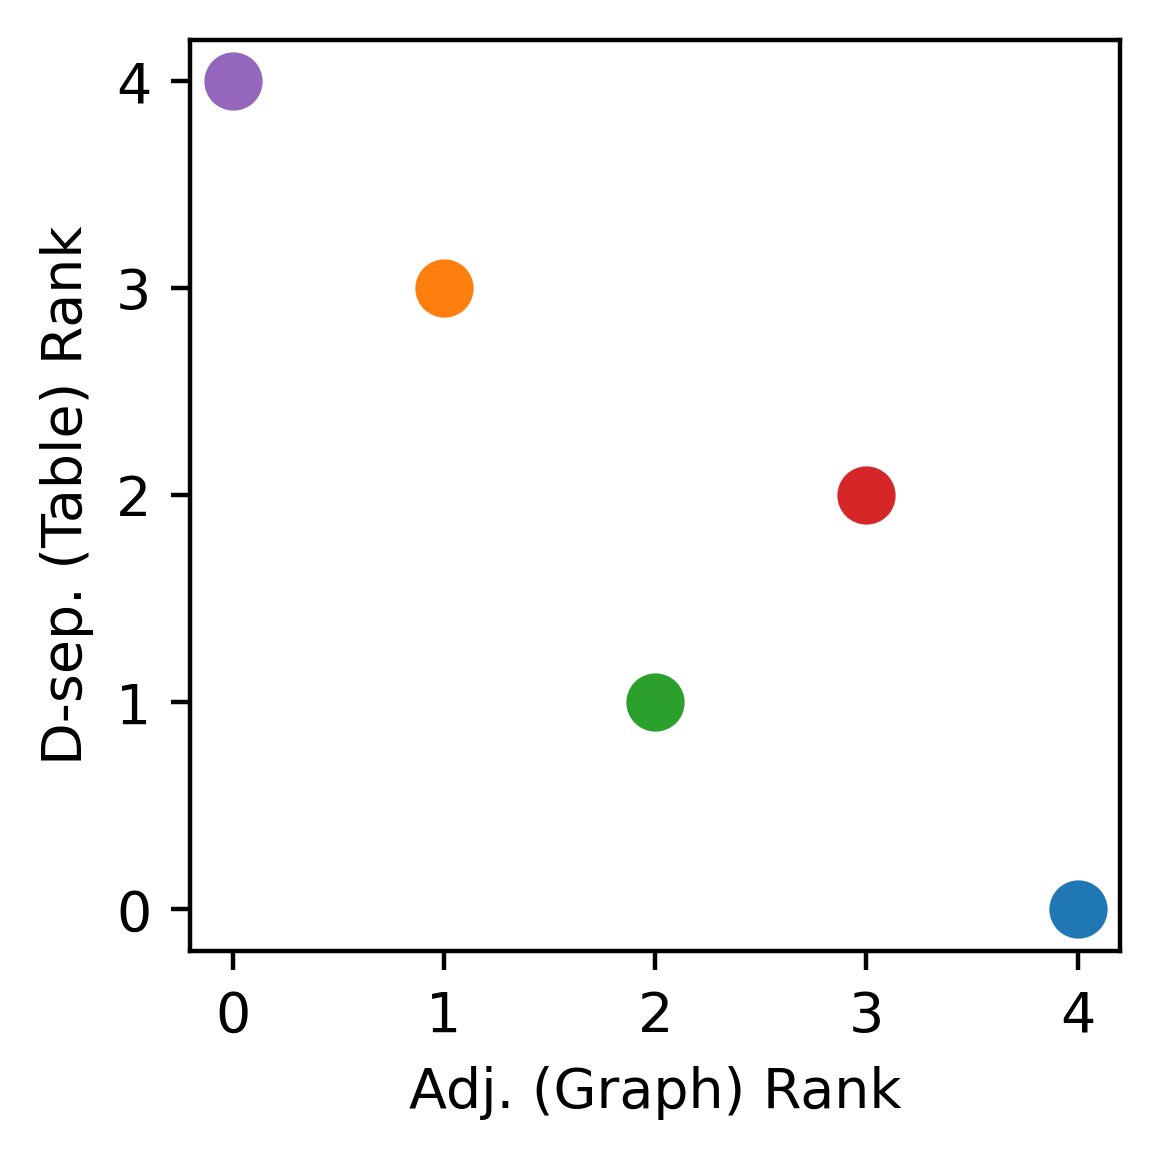

In [84]:
rank_score_graph_adj,rank_score_table_dsep,corr = score_ranks(graph_adj,dsep,1)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
# plt.title(f'D-separation based tasks \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('Adj. (Graph) Rank')
plt.ylabel('D-sep. (Table) Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_graph_adj[i],rank_score_table_dsep[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('adj_dsep.png', bbox_inches='tight')



print(corr)

[[ 1.  -0.5]
 [-0.5  1. ]]


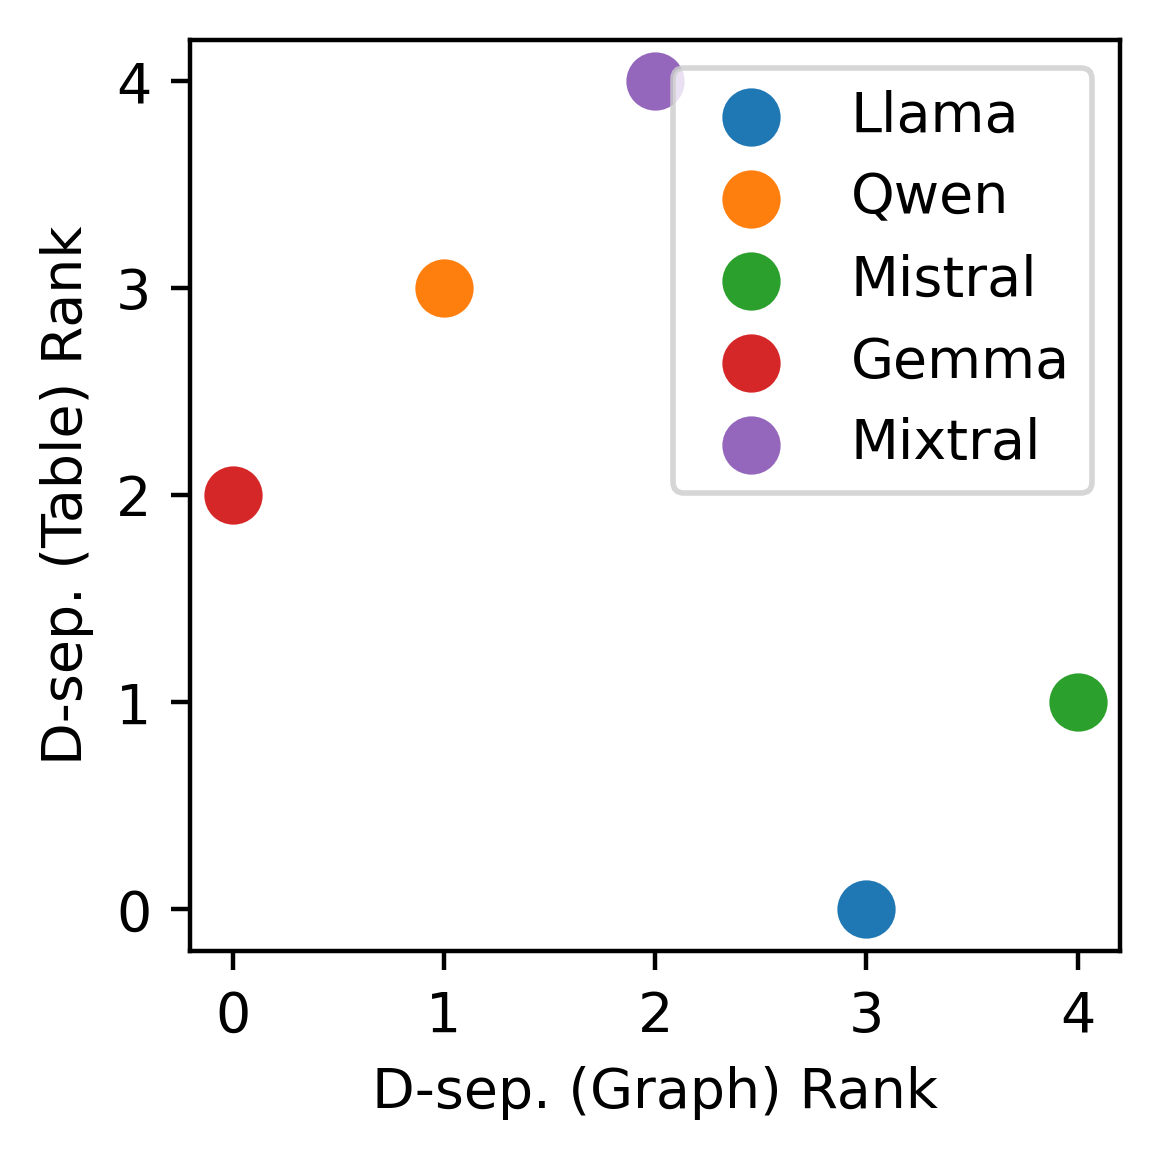

In [85]:
rank_score_graph_dsep,rank_score_table_dsep,corr = score_ranks(graph_d_sep,dsep,1)
figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
# plt.title(f'D-separation based tasks \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('D-sep. (Graph) Rank')
plt.ylabel('D-sep. (Table) Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_graph_dsep[i],rank_score_table_dsep[i],s=90)
    plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('dsep.png', bbox_inches='tight')



print(corr)

In [ ]:
graph_adj = [0.75, 0.9, 0.83,0.81,0.95]
graph_d_sep = [0.475, 0.514, 0.464,0.562,0.482]

dsep= [0.562,0.5,0.554,0.5,0]
cdir= [0.321,0,0.429,0,0]

intv= [0.2053,2.612,2.145,10,2.409]
cf= [1.586,1.475,1.50,10,1.125]

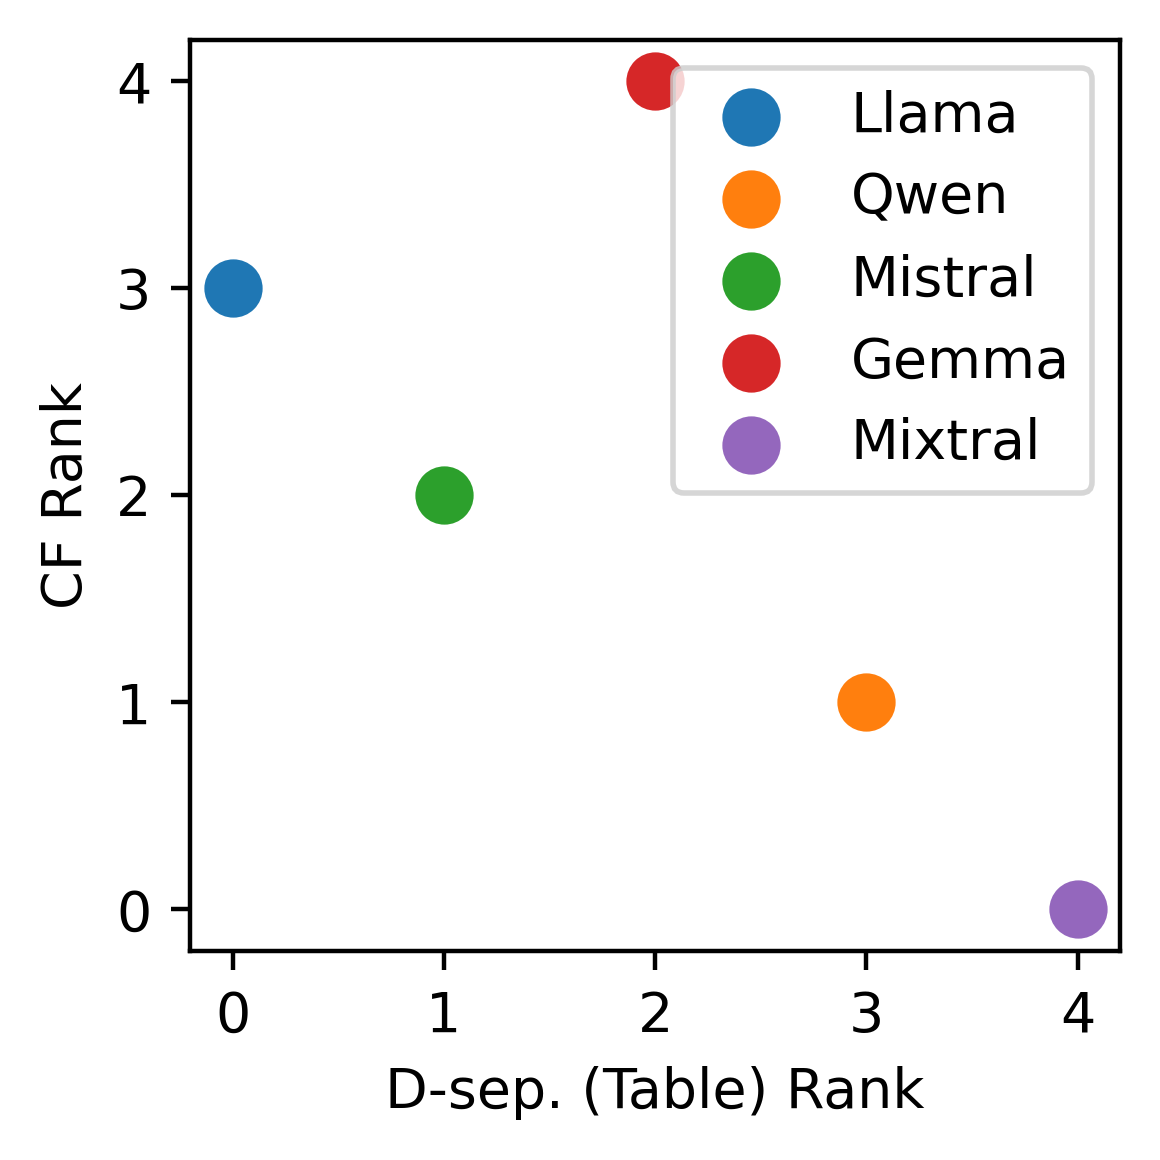

In [95]:
rank_score_table_dsep,rank_score_cf,corr = score_ranks(dsep,cf,2)

figure(figsize=(3, 3), dpi=400)    
# Create a scatter plot
# plt.title(f'D-sep (table) and counterfactual distribution estimation \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('D-sep. (Table) Rank')
plt.ylabel('CF Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_table_dsep[i],rank_score_cf[i],s=90)
    plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('tdsep_cf.png', bbox_inches='tight')



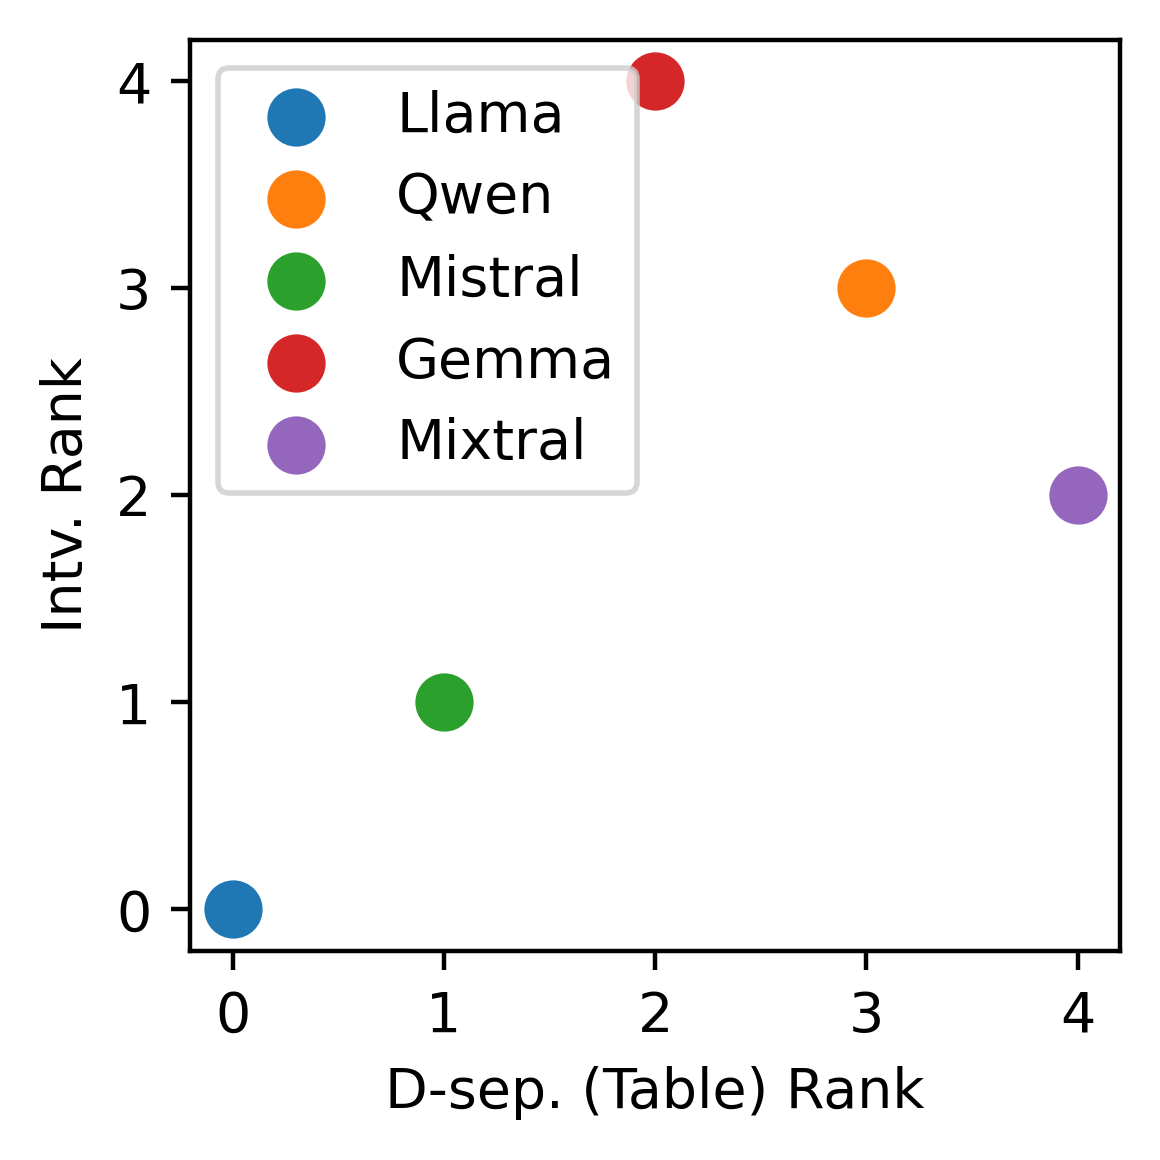

In [105]:
rank_score_table_dsep,rank_score_intv,corr = score_ranks(dsep,intv,2)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
plt.xlabel('D-sep. (Table) Rank')
plt.ylabel('Intv. Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_table_dsep[i],rank_score_intv[i],s=90)
    plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('tdsep_intv.png', bbox_inches='tight')



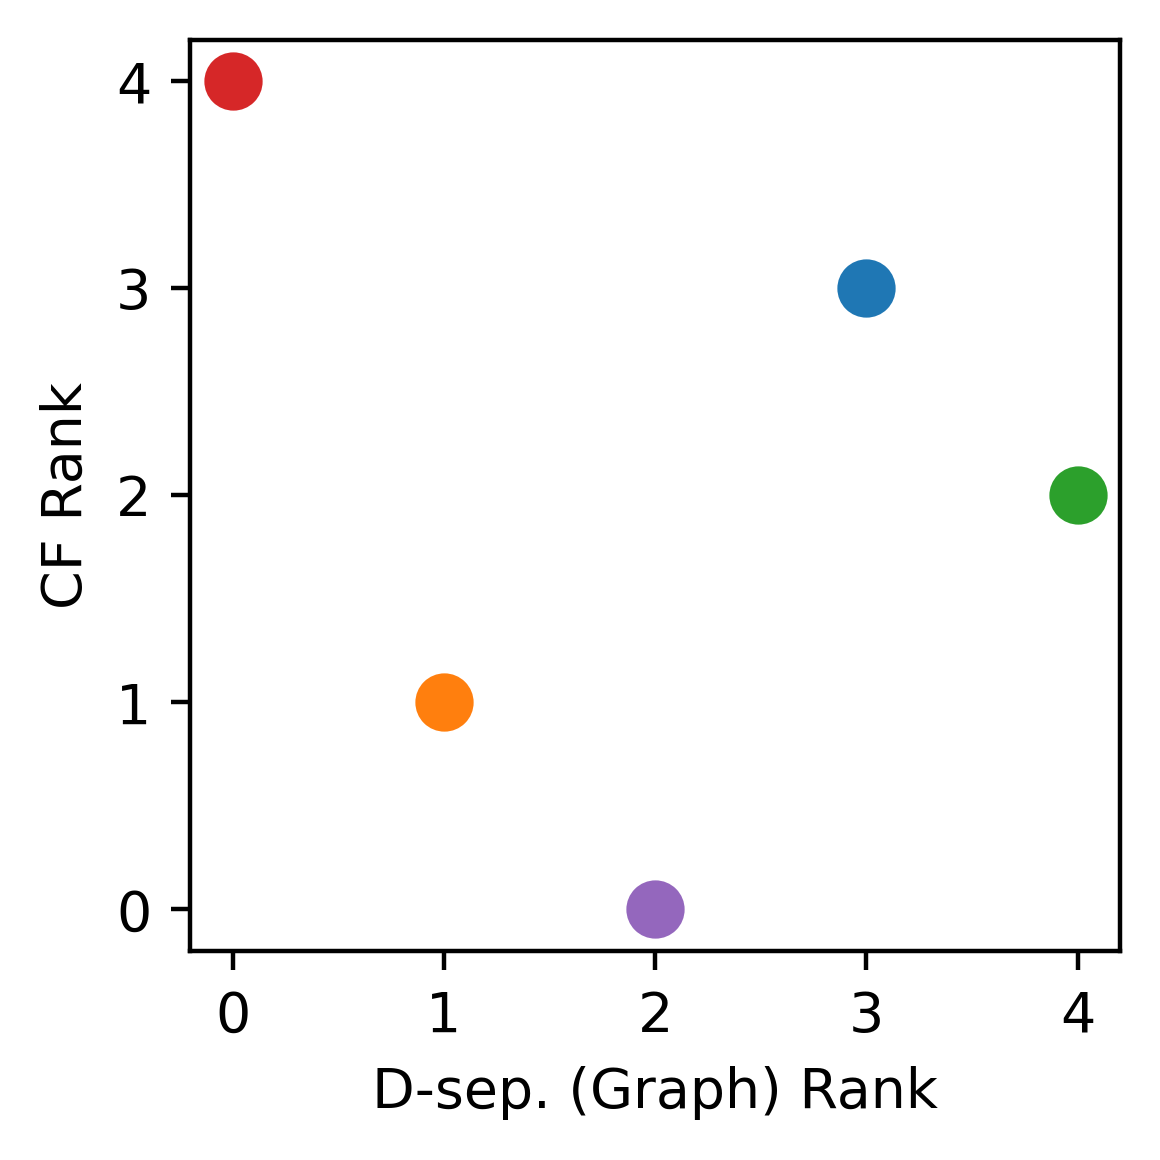

In [106]:
rank_score_graph_dsep,rank_score_cf,corr = score_ranks(graph_d_sep,cf,2)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
# plt.title(f'D-separation (graph) and counterfactual distribution estimation \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('D-sep. (Graph) Rank')
plt.ylabel('CF Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])

for i in range(5):
    plt.scatter(rank_score_graph_dsep[i],rank_score_cf[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('gdsep_cf.png', bbox_inches='tight')



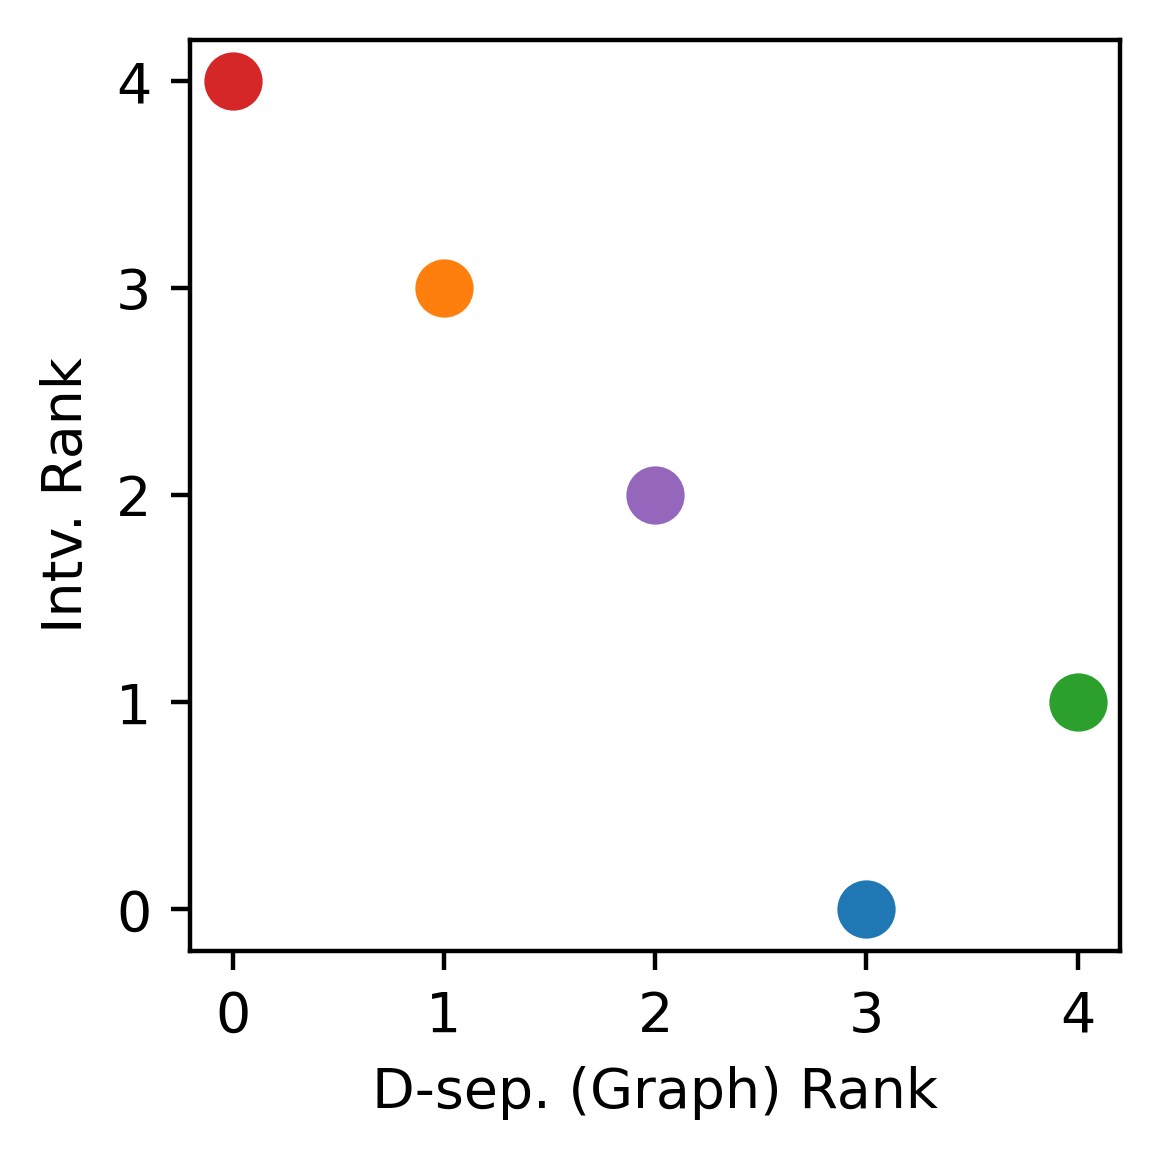

In [104]:
rank_score_graph_dsep,rank_score_intv,corr = score_ranks(graph_d_sep,intv,2)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
# plt.title(f'D-separation (graph) and interventional distribution estimation \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('D-sep. (Graph) Rank')
plt.ylabel('Intv. Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_graph_dsep[i],rank_score_intv[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('gdsep_intv.png', bbox_inches='tight')



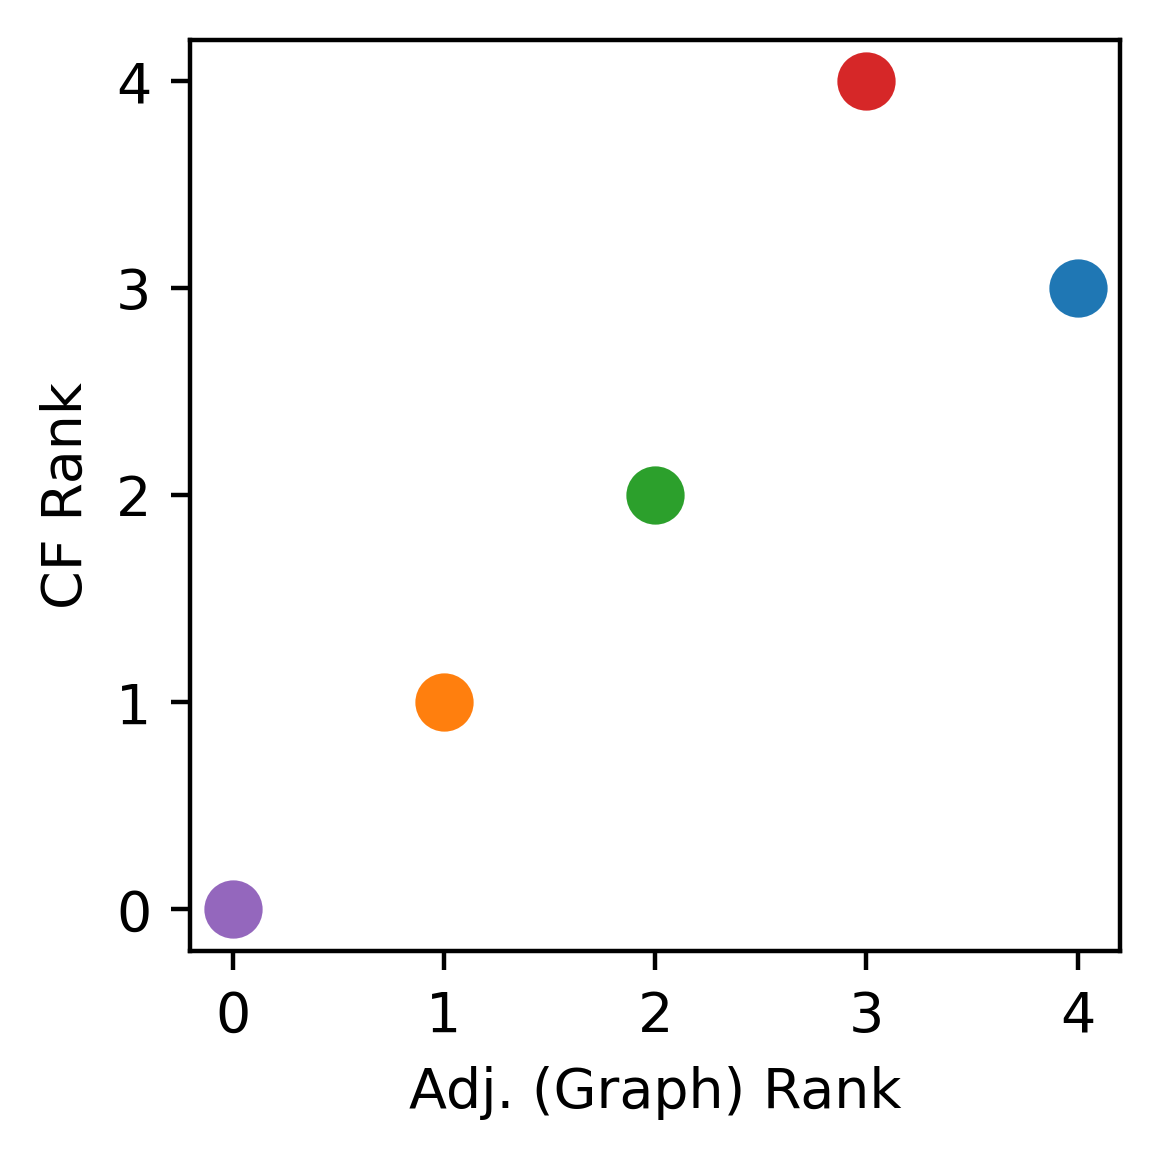

In [107]:
rank_score_graph_adj,rank_score_cf,corr = score_ranks(graph_adj,cf,2)

figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
# plt.title(f'Adj. (Graph) and counterfactual distribution estimation \n with correlation coeff {corr[0,1]:.3}')
plt.xlabel('Adj. (Graph) Rank')
plt.ylabel('CF Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_graph_adj[i],rank_score_cf[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('adj_cf.png', bbox_inches='tight')



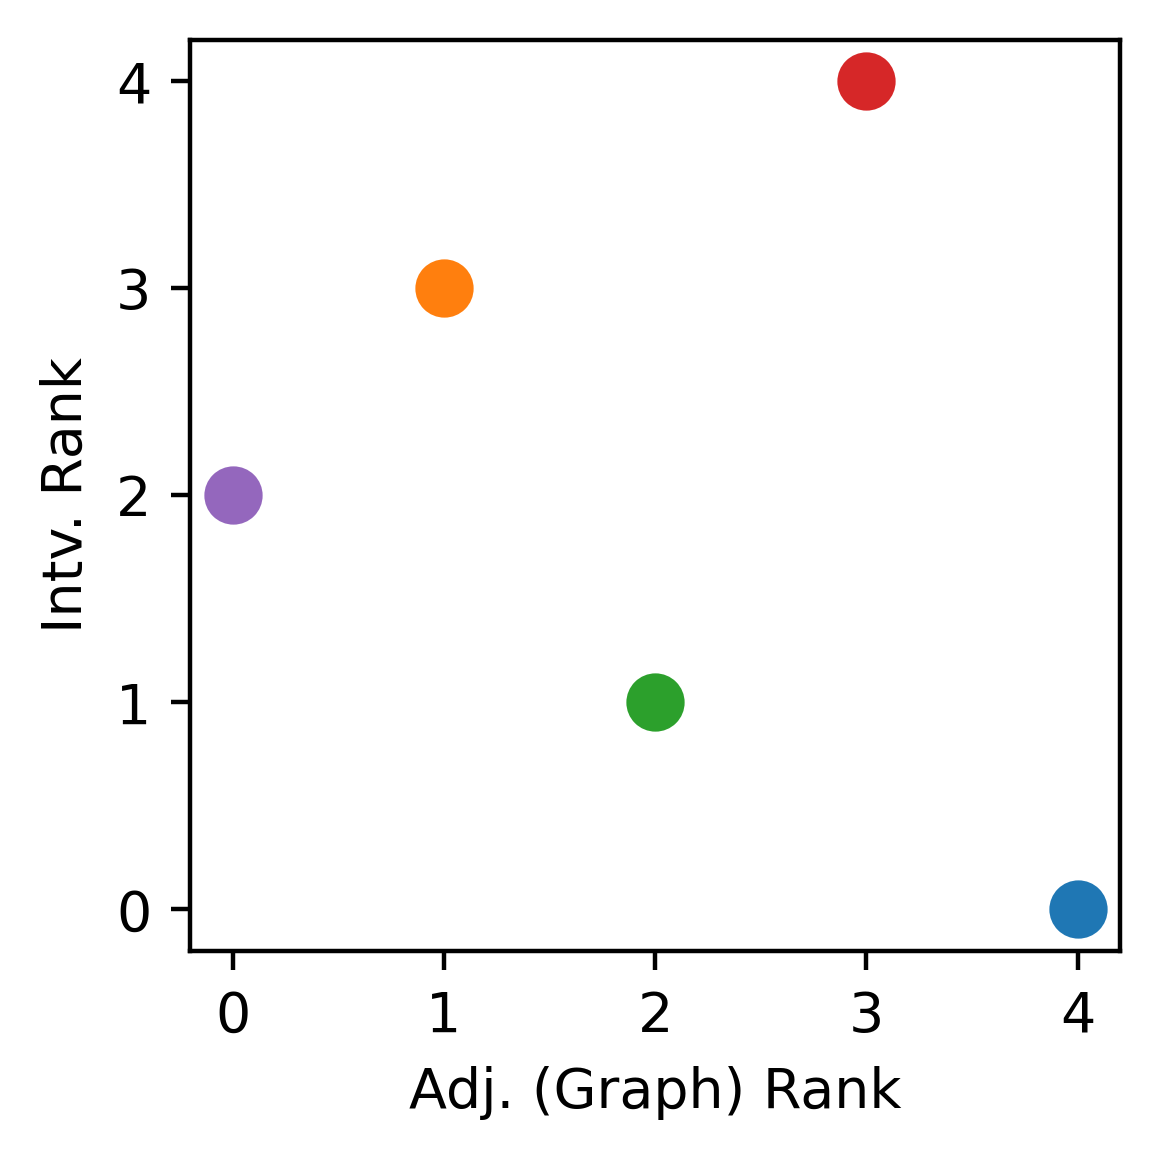

In [93]:
rank_score_graph_adj,rank_score_intv,corr = score_ranks(graph_adj,intv,2)
figure(figsize=(3, 3), dpi=400)
    
# Create a scatter plot
# plt.title(f'Adjacency matrix (graph) and interventional distribution estimation \n with correlation coeff {corr[0,1]:.3}')

plt.xlabel('Adj. (Graph) Rank')
plt.ylabel('Intv. Rank')

# setting x-axis values
plt.xticks(x, [f'{i}' for i in range(5)])
plt.yticks(x, [f'{i}' for i in range(5)])
for i in range(5):
    plt.scatter(rank_score_graph_adj[i],rank_score_intv[i],s=90)
    # plt.legend(methods)
plt.tight_layout()
# Save the plot as a PNG file with full content
plt.savefig('adj_intv.png', bbox_inches='tight')

